<a href="https://colab.research.google.com/github/architranjan/ML/blob/main/flowercnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


In [43]:
import cv2
import os
import PIL

In [3]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dir = tf.keras.utils.get_file('flower_photos' , url , cache_dir='.' , untar=True)

228813984/228813984 [==============================] - 4s 0us/step


In [4]:
import pathlib
dir = pathlib.Path(dir)
dir

PosixPath('datasets/flower_photos')

In [5]:
total_img = len(list(dir.glob('*/*.jpg')))
total_img

3670

In [6]:
roses = list(dir.glob('roses/*'))

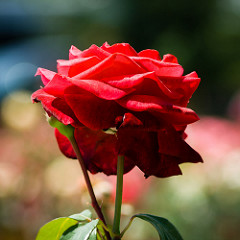

In [7]:
PIL.Image.open((str(roses[8])))

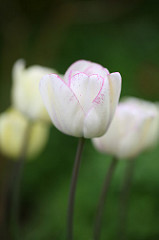

In [8]:
tulips = list(dir.glob('tulips/*'))
PIL.Image.open(str(tulips[9]))

In [9]:
flower_dir = {
    'roses' : list(dir.glob('roses/*')),
    'daisy' : list(dir.glob('daisy/*')),
    'dandelion' : list(dir.glob('dandelion/*')),
    'sunflowers' : list(dir.glob('sunflowers/*')),
    'tulips' :  list(dir.glob('tulips/*')),
}

In [10]:
img = cv2.imread(str(flower_dir['roses'][0]))
img.shape

(334, 500, 3)

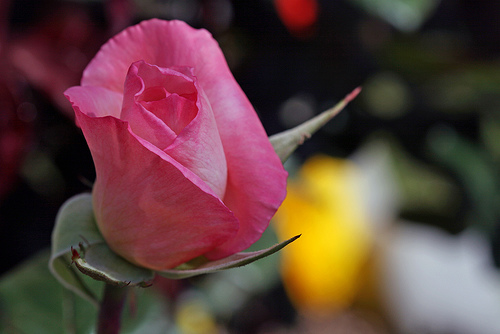

In [11]:
PIL.Image.open((str(flower_dir['roses'][0])))

In [12]:
cv2.resize(img , (180 , 180)).shape

(180, 180, 3)

In [13]:
flower_label = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' :2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [14]:
x=[]
y=[]

In [15]:
for name , image in flower_dir.items():
  for i in image:
    img = cv2.imread(str(i))
    resized = cv2.resize(img , (180,180))
    x.append(resized)
    y.append(flower_label[name])

In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
x.shape

(3670, 180, 180, 3)

array([[[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]],

       [[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]],

       [[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]],

       ...,

       [[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]],

       [[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]],

       [[247, 246, 248],
        [247, 246, 248],
        [247, 246, 248],
        ...,
        [247, 246, 248],
        [247, 246, 248],
        [247, 246, 248]]], dtype=uint8)
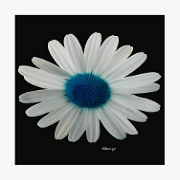

In [18]:
x[785]

In [19]:
y[785]

1

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
x_train.shape

(2752, 180, 180, 3)

array([[[ 96,  96,  96],
        [ 65,  65,  65],
        [ 52,  52,  52],
        ...,
        [ 26,  26,  26],
        [ 26,  26,  26],
        [ 38,  38,  38]],

       [[134, 134, 134],
        [ 90,  90,  90],
        [ 64,  64,  64],
        ...,
        [ 35,  35,  35],
        [ 35,  35,  35],
        [ 46,  46,  46]],

       [[155, 155, 155],
        [121, 121, 121],
        [ 94,  94,  94],
        ...,
        [ 41,  41,  41],
        [ 40,  40,  40],
        [ 51,  51,  51]],

       ...,

       [[ 46,  46,  46],
        [ 76,  76,  76],
        [ 89,  89,  89],
        ...,
        [ 26,  26,  26],
        [ 76,  76,  76],
        [ 97,  97,  97]],

       [[ 50,  50,  50],
        [ 63,  63,  63],
        [ 80,  80,  80],
        ...,
        [ 11,  11,  11],
        [ 66,  66,  66],
        [ 83,  83,  83]],

       [[ 53,  53,  53],
        [ 53,  53,  53],
        [ 80,  80,  80],
        ...,
        [ 14,  14,  14],
        [ 35,  35,  35],
        [ 58,  58,  58]]], dtype=uint8)
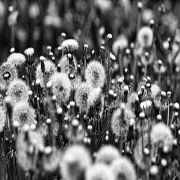

In [22]:
x_train[90]

In [23]:
y_train[90]

2

In [24]:
x_train = x_train/255
x_test = x_test/255

In [25]:
data_aug = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
     keras.layers.experimental.preprocessing.RandomRotation(0.1),
     keras.layers.experimental.preprocessing.RandomZoom(0.1),
     keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
     keras.layers.experimental.preprocessing.RandomContrast(factor=0.1),


])


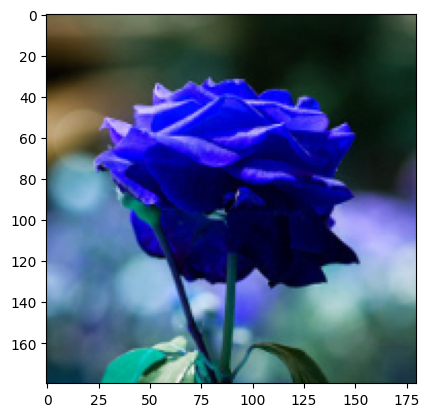

In [26]:
plt.imshow(x[8])

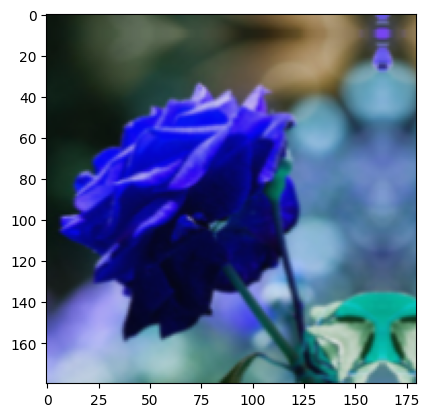

In [27]:
plt.imshow(data_aug(x)[8].numpy().astype('uint8'))

In [28]:
model = keras.Sequential([
        data_aug ,

        keras.layers.Conv2D(32 , 3 ,padding='same', activation='relu' ,input_shape=(180,180,3,)),

        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(64 , 3 ,padding='same' ,activation='relu' ),

        keras.layers.MaxPooling2D(),

         keras.layers.Conv2D(128 , 3 ,padding='same' ,activation='relu' ),

        keras.layers.MaxPooling2D(),


        keras.layers.Dropout(0.3),


        keras.layers.Flatten(),
        keras.layers.Dense(256 , activation='relu'),
          keras.layers.BatchNormalization(),
         keras.layers.Dropout(0.5),

          keras.layers.Dense(128 , activation='relu'),
          keras.layers.BatchNormalization(),
         keras.layers.Dropout(0.5),

        keras.layers.Dense(5 , activation='softmax')

])
model.compile(optimizer='adam' , loss='SparseCategoricalCrossentropy' , metrics=['accuracy'])

model.fit(x_train , y_train , epochs=30)


Epoch 1/30
86/86 [==============================] - 234s 3s/step - loss: 1.7898 - accuracy: 0.3834
Epoch 2/30
86/86 [==============================] - 229s 3s/step - loss: 1.5391 - accuracy: 0.4342
Epoch 3/30
86/86 [==============================] - 232s 3s/step - loss: 1.4105 - accuracy: 0.4578
Epoch 4/30
86/86 [==============================] - 228s 3s/step - loss: 1.2926 - accuracy: 0.4971
Epoch 5/30
86/86 [==============================] - 232s 3s/step - loss: 1.2375 - accuracy: 0.5174
Epoch 6/30
86/86 [==============================] - 234s 3s/step - loss: 1.1319 - accuracy: 0.5556
Epoch 7/30
86/86 [==============================] - 232s 3s/step - loss: 1.0924 - accuracy: 0.5709
Epoch 8/30
86/86 [==============================] - 234s 3s/step - loss: 1.0770 - accuracy: 0.5828
Epoch 9/30
86/86 [==============================] - 229s 3s/step - loss: 1.0095 - accuracy: 0.6025
Epoch 10/30
86/86 [==============================] - 228s 3s/step - loss: 0.9734 - accuracy: 0.6195
Epoch 11/

In [38]:
model.evaluate(x_test , y_test)

29/29 [==============================] - 20s 695ms/step - loss: 0.7224 - accuracy: 0.7320


[0.7223706245422363, 0.7320261597633362]

In [39]:
predicted = model.predict(x_test)

29/29 [==============================] - 18s 625ms/step


In [40]:
ans = []
for i in range(10):
  ans.append(np.argmax(predicted[i]))
ans

[1, 1, 2, 4, 0, 3, 2, 4, 3, 4]

In [41]:
y_test[0:10]

array([1, 0, 2, 4, 2, 3, 0, 4, 3, 4])